# Medical Insurance Cost Prediction Project 

### Project Overview

This project analyzes the Medical Insurance Dataset and builds predictive models to estimate insurance charges using machine learning techniques. The workflow covers data loading, exploration, preprocessing, visualization, model training, and evaluation.

### Dataset Information

The dataset contains 1338 records and 7 features:

- age (int)
- sex (object)
- bmi (float)
- children (int)
- smoker (object)
- region (object)
- charges (float)

All features are non-null and complete.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/hrishinandanmacbook/Developer/ML/001/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

### Exploratory Data Analysis (EDA)

- Summary statistics
- Data types inspection
- Basic visualizations

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

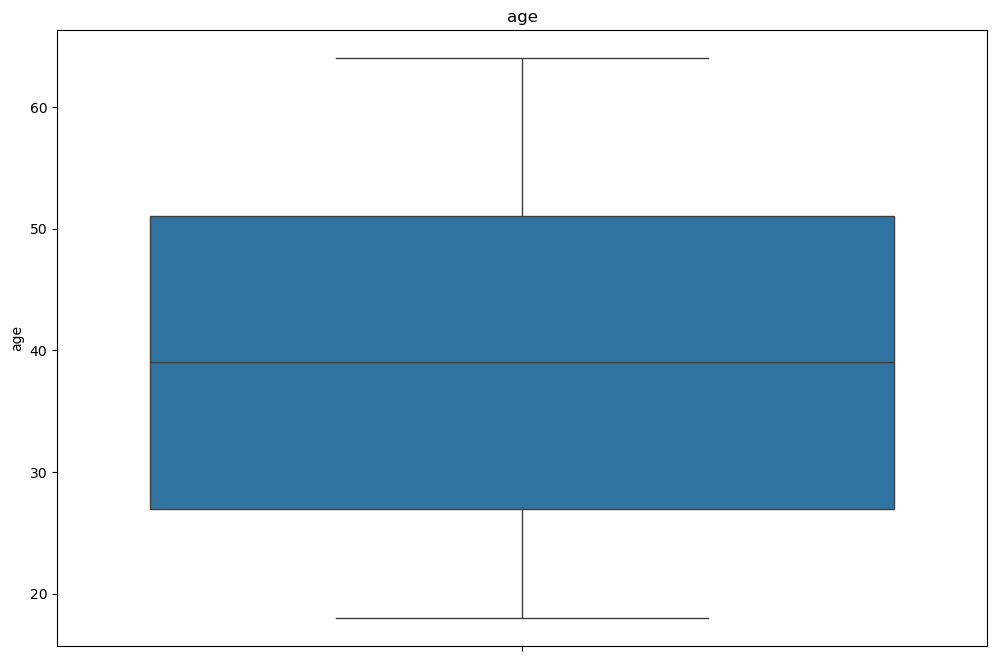

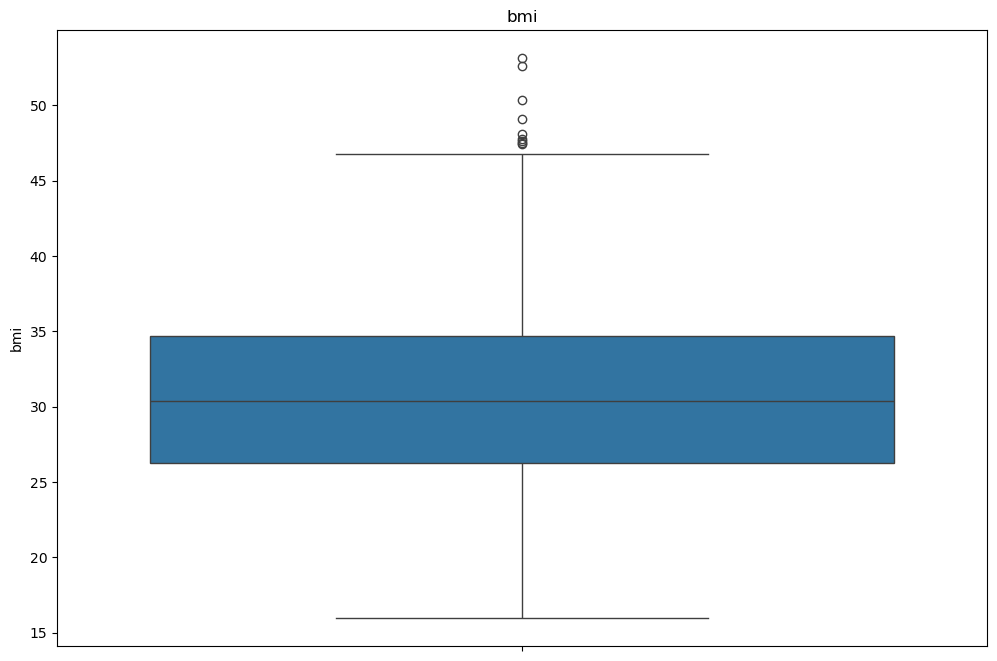

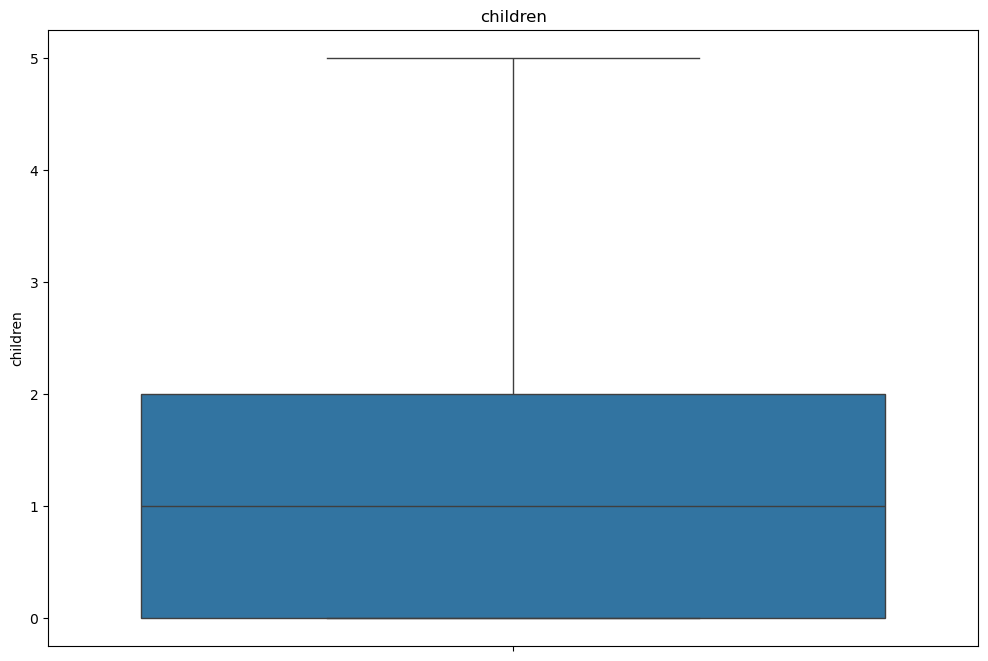

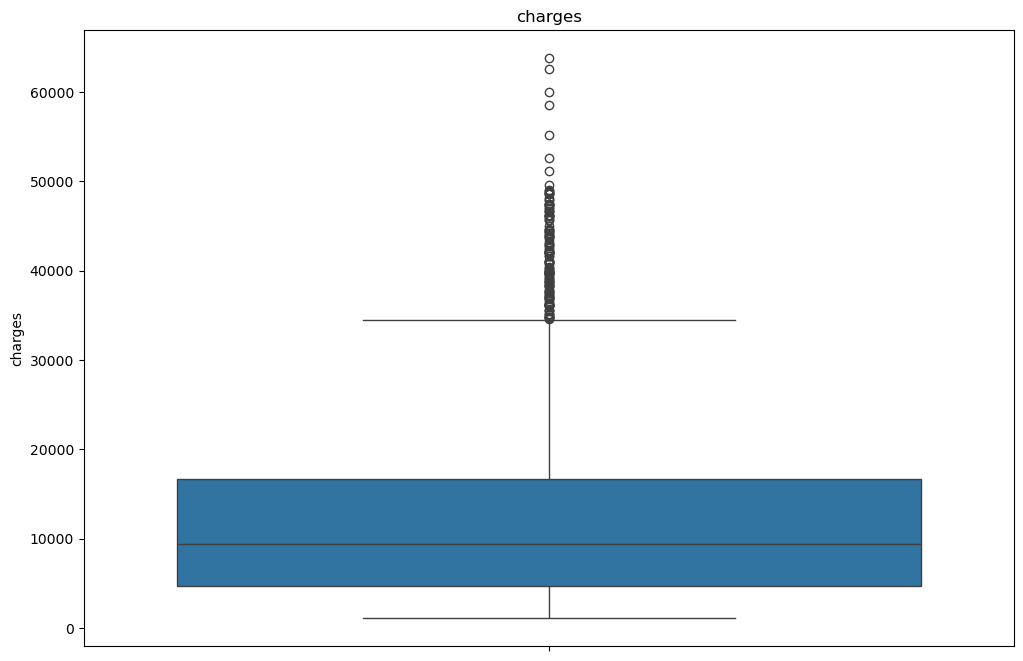

In [11]:
for col in df_num.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(df_num[col])
    plt.title(col)
    plt.show()

In [12]:
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q1 + 1.5*iqr
    df_num[col] = df_num[col].clip(lower=lower, upper=upper)

In [13]:
df_encoded = pd.get_dummies(df_cat, columns=df_cat.columns, drop_first=True)

In [14]:
df = pd.concat([df_num, df_encoded], axis=1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('charges', axis=1)
y = df['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Development

Models typically include:
- Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression

#### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(X_test)

### Evaluation Metrics

Common metrics used:

- R² Score
- MSE
- RMSE

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [23]:
print(r2)
print(mse)

0.8090761098707089
10221312.935341043


#### Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=3)

In [26]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [27]:
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred_poly = model.predict(X_test_poly)

In [29]:
r2 = r2_score(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)

In [30]:
print(r2)
print(mse)

0.8013531097596386
10634771.936629286


#### Ridge Regression

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [33]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [34]:
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)

In [35]:
print(r2)
print(mse)
print(r2)

0.8057432870896144
10399739.137428857
0.8057432870896144


#### Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [38]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [39]:
r2 = r2_score(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)

In [40]:
print(r2)
print(mse)

0.8066691928194969
10350169.79224452


### Summary

Linear Regression provides the best fit with an R² of about 0.809. Other models (Ridge, Lasso, Polynomial) show similar performance, indicating the dataset is largely linear and gains little from regularization or polynomial expansion. Summaries of insights and model comparison outcomes.